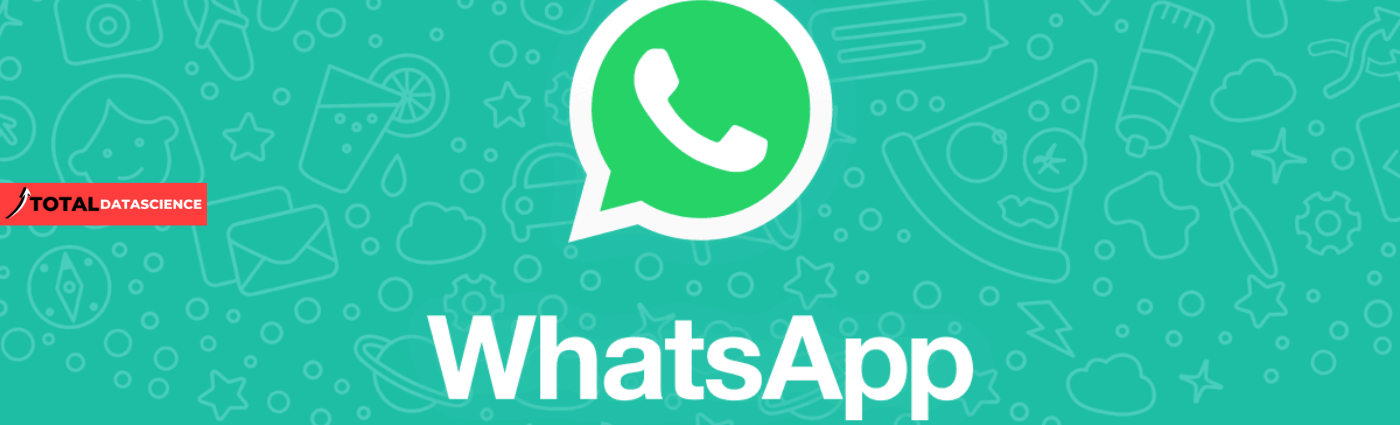

#**WhatsApp Chat Analysis with Python**

###Author: **MrBriit**

**IMPORTANT**

This tutorial assumes that you have a basic knowledge of Python.

If not, you can quickly brush up your concepts of Python programming with the [Python Crash Course on Udemy](https://bit.ly/UDEMY-pythoncrashcourse)

WhatsApp founded by Brian Acton and Jan Koum, former employees of Yahoo! has become the No.1 messaging App so far.

<br>

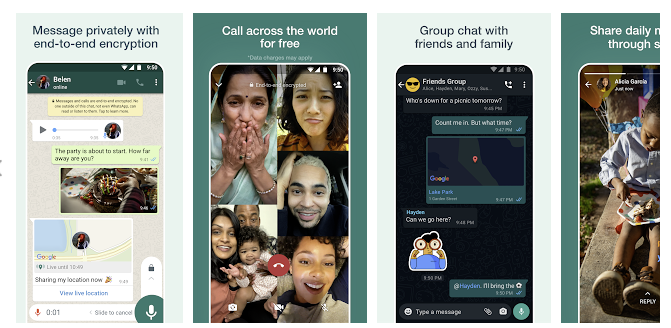
<br>



WhatsApp is used by over **2 Billion people** in more than 180 countries. With this number of reach, chances are you and I are using it too. 

But the question is: *do you know how you interract with WhatsApp Messenger?*

In this tutorial, we use Python to analyze our personal WhatsApp data.





##**Obtaining The Data**

We can do the analysis on either individual chat or group chat. The process is the same just variation of data.

**NB**: Do the following process from your phone and then transfer the data to your laptop to continue.

WhatsApp allows you to export your chats through a .txt format.

1. To get satrted, go to the respective chat, which you want to export and click on the **three dots(...)** at the upper right corner!

2. Tap on **options**==>**More**==>**Export Chat**.

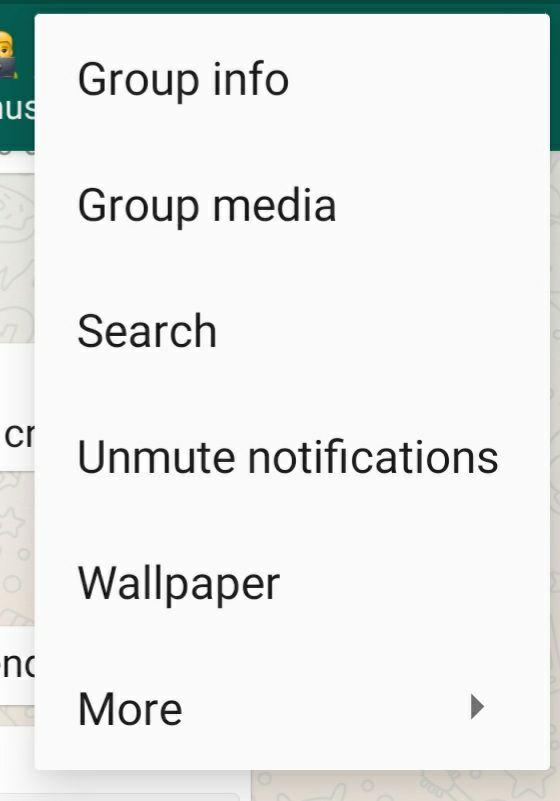


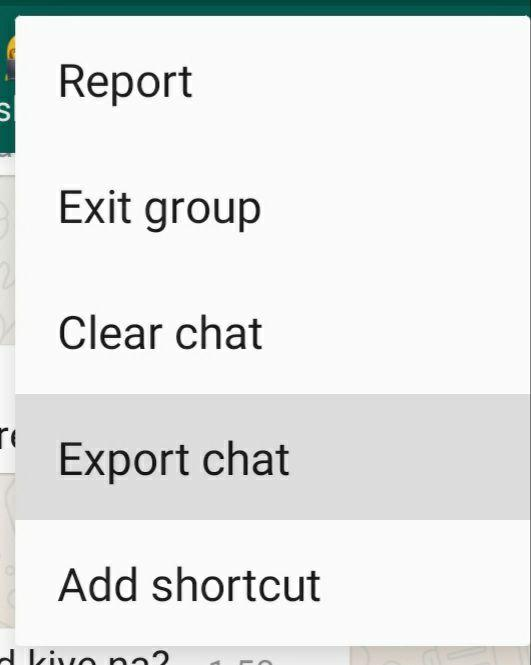

3. I will be Exporting **Without Media.**


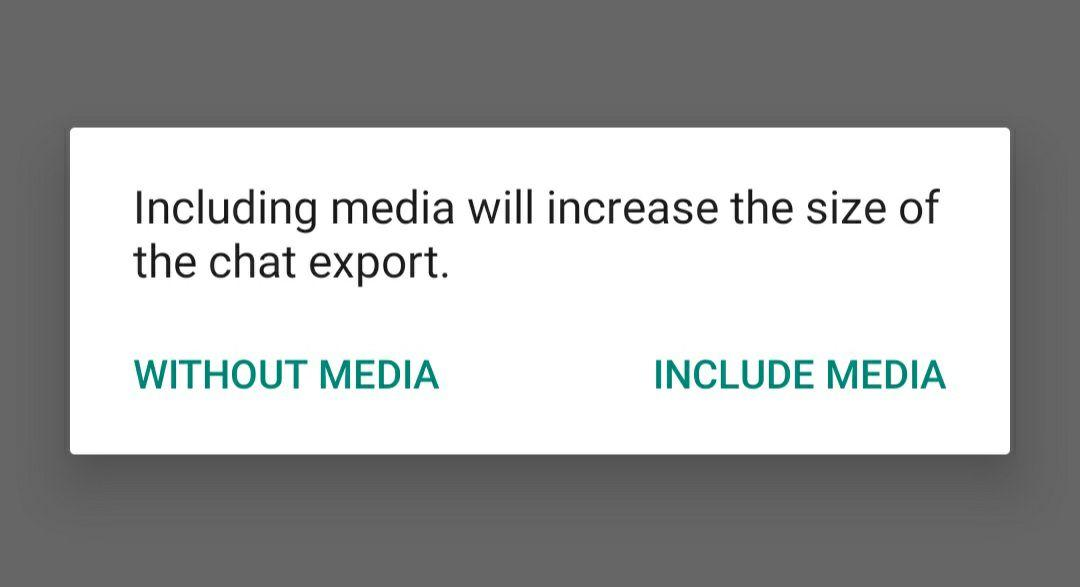

**NB:** 

* ***Without media:*** exports about 40k messages

* ***With media:*** exports about 10k messages along with pictures/videos.
* While exporting data, avoid including media files because if the number of media files is greater than certain figure then not all the media files are exported.


<BR>

*Congratulations !!*

Now that we have our data ready, let's get to work.


**By the end of this tutorial, you will understand Python better by being able to use Python to:**

1. Check overall frequency of total messages on the group.

2. Check top 10 most active days of messaging.

3. Check top 10 active users in the group.

4. Fing out the ghosts/inactive members the in the group.

5. Check Top 10 Users Most Sent Media, Total Messages, Average Words Per Messsage.

7. Most active hours of the days.

3. Most active Days of the Month
9. Most active months of the year.
9. Create a WordCloud for the most used words.
6. Check top 10 most used emojis.

<br>

##**Import The Necessary Libraries**

In this tutorial we will be using the following :

**Regex (re)** to extract and manipulate strings based on specific patterns.

Refer to the following resources for more about regular expressions.

  * [Regex - Python Docs](https://docs.python.org/3/library/re.html)
    
  * [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
    
  * [Regex Test - live](https://regexr.com/)



In [16]:
!pip install emoji

     |████████████████████████████████| 175 kB 20.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171030 sha256=5c52f6a4f68234de597a65aff4a683809b0792acc7b9a3c7ea7489b5507362ba
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b7/c0/67/93ab86d74ab81bb91fd8611c497dbb7a4c26e4d941caddf70c
Successfully built emoji


In [9]:
!pip install wordcloud

In [19]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import emoji
# import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [20]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df


NOTE:

* Since WhatsApp texts are multi-line, you cannot just read the file line by line and get each message that you want. Instead, you need a way to identify if a line is a new message or part of an old message. You could use regular expressions.
* While reading each line, I split it based on a comma and take the first item returned from the split() function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

In [23]:

df = rawToDf('whatsapp-chat-data.txt', '12hr')
df

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [24]:

df.sample(10)

,date_time,user,message
12189,2020-09-13 20:09:00,"Tanay Kamath (TSEC, CS)",what!/
6163,2020-05-12 05:04:00,"Kartik Soneji (TSEC, CS)","On a keyboard, it is Shift + 6."
10307,2020-08-24 13:10:00,+91 84335 18102,ads is the last thing they would do
5414,2020-04-26 21:01:00,+91 73043 57388,"Clion is paid not free,right?"
5180,2020-04-23 21:59:00,Tushar Nankani,The headline ends with a question mark 🤦🏻‍♂️
9281,2020-07-31 20:50:00,+91 90822 59476,Can anyone plz tell which extension files are...
7837,2020-06-17 12:09:00,Tushar Nankani,<Media omitted>
7977,2020-06-25 13:21:00,"Harsh Kapadia (TSEC IT, SE)",Dev Ed!
2826,2020-03-07 22:52:00,"Farhan Irani (TSEC IT, SE)",What is the question s
4124,2020-03-28 17:03:00,"Pratik K (TSEC CS, SE)",https://atcoder.jp/contests/abc160


In [34]:
df

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [33]:
df.user.unique()

array(['group_notification', '+91 96536 93868',
       'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875', '+91 95949 08570',
       '+91 79778 76844', '+91 90499 38860', 'Tanay Kamath (TSEC, CS)',
       'Saket (TSEC, CS)', '+91 77568 95072', 'Rohit Pathak (TSEC, CS)',
       '+91 75078 05454', 'Darshan Rander (TSEC, IT)', '+91 79774 68083',
       '+91 70394 60876', '+91 96191 55044', '+91 90678 93300',
       'Mohit Varma (TSEC, CS)', '+91 79770 56210',
       'Chirag Sharma (TSEC, CS)', 'Vivek Iyer (TSEC, Biomed)',
       'Tushar Nankani', '+91 81696 22410', '+91 89764 07509',
       '+91 78758 66747', 'Ankit (TSEC, CS)', '+91 86556 33169',
       '+91 76663 28147', '+91 88284 70904', '+91 97698 67348',
       'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)', '+91 91680 38866',
       'Pranay Thakur (TSEC, CS)', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+9

##**Adding Day, Month, Year, and Date for further analysis**

In [35]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


##**Check overall frequency of total messages on the group.**

Over here we will use the date and the count of messages to understand the overall trend of messaging in the group.

In [37]:
new_df = df.copy()      # let's use a copy of our dataset for this analysis.
new_df['message_count'] = new_df.shape[0]*[1]      # adding extra helper column --> message_count.
new_df

,date_time,user,message,day,month,year,date,message_count
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26,1
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24,1
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26,1
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26,1
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26,1
...,...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02,1
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02,1
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02,1
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02,1


In [43]:
new_df

,date,year,message_count
0,2020-01-24,2020,1
1,2020-01-26,212100,105
2,2020-01-27,181800,90
3,2020-01-28,254520,126
4,2020-01-29,238360,118
...,...,...,...
237,2020-09-28,290880,144
238,2020-09-29,98980,49
239,2020-09-30,337340,167
240,2020-10-01,183820,91


In [44]:
new_df = new_df.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
new_df

,date,year,message_count
0,2020-01-24,2020,1
1,2020-01-26,212100,105
2,2020-01-27,181800,90
3,2020-01-28,254520,126
4,2020-01-29,238360,118
...,...,...,...
237,2020-09-28,290880,144
238,2020-09-29,98980,49
239,2020-09-30,337340,167
240,2020-10-01,183820,91


In [45]:
new_df.drop(columns='year', inplace=True)         # let's drop the year since we will need only the date and message count for our analysis
new_df

,date,message_count
0,2020-01-24,1
1,2020-01-26,105
2,2020-01-27,90
3,2020-01-28,126
4,2020-01-29,118
...,...,...
237,2020-09-28,144
238,2020-09-29,49
239,2020-09-30,167
240,2020-10-01,91


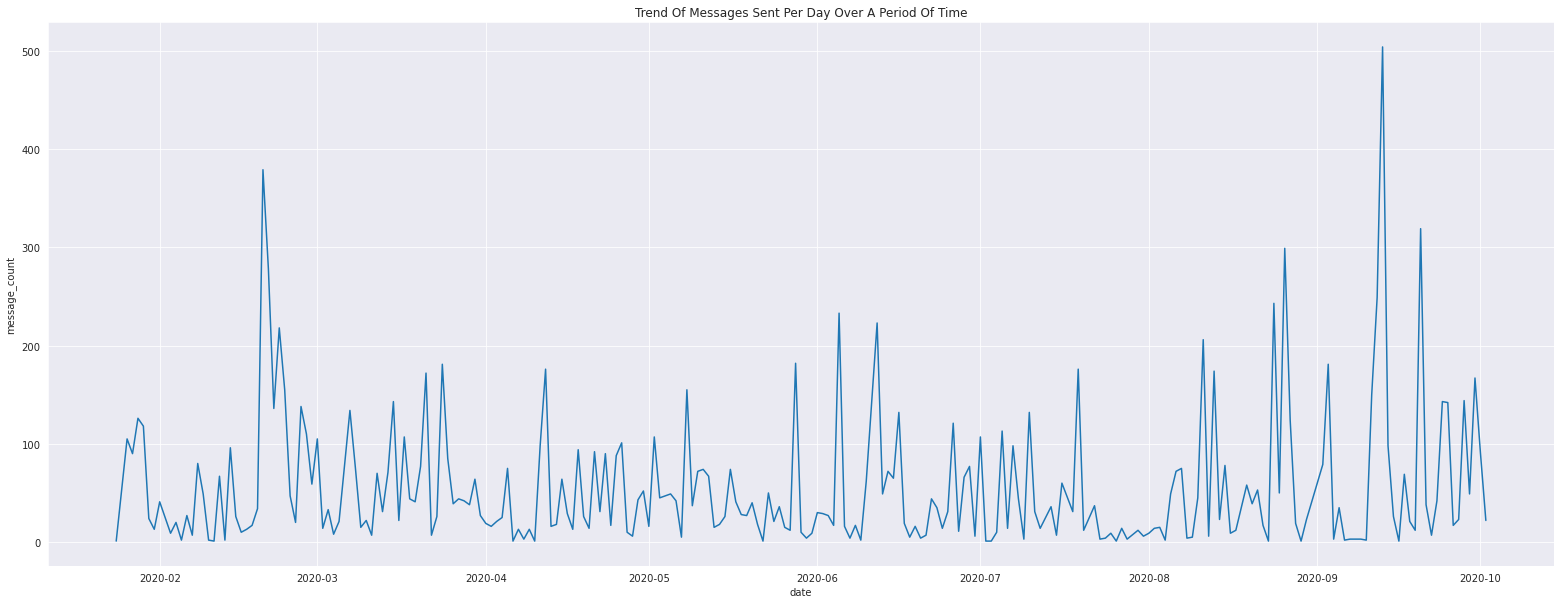

In [46]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
plt.figure(figsize = (27, 10))     # Same as ``


plt.title('Trend Of Messages Sent Per Day Over A Period Of Time');
sns.lineplot(new_df.date, new_df.message_count);   

 #Alternatively
## plt.plot(new_df.date, new_df.message_count)


# Saving the plots
# plt.savefig('msg_plots.svg', format = 'svg')

We can see that there times where there will more messages being sent in the group, as much as about 158 in 0ctober 20219. 

We can also notice that somewhere July 2020, there was less messages being sent in the group. Overall, the trend is inconsistent, sometimes more chats go on, sometimes the group becomes silent and that's the normal behavior of typical WhatsApp group.

##**Check top 10 most active days of messaging.**

In [47]:
top10days = new_df.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns
               ="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2020-09-13,504
1,2020-02-20,379
2,2020-09-20,319
3,2020-08-26,299
4,2020-02-21,278
5,2020-09-12,249
6,2020-08-24,243
7,2020-06-05,233
8,2020-06-12,223
9,2020-02-23,218


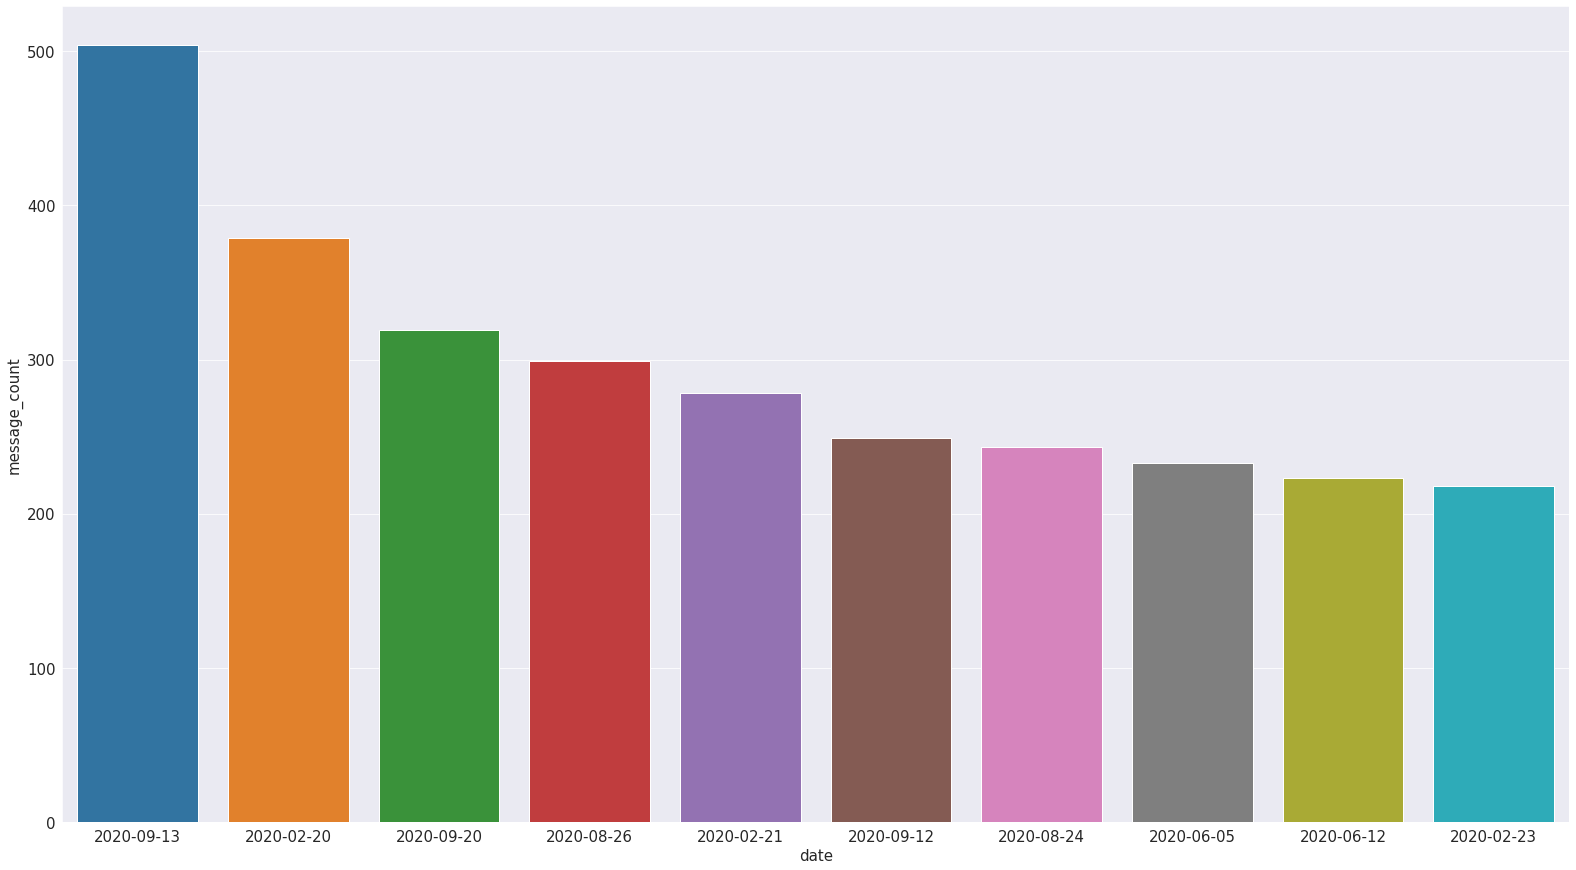

In [48]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize = (27, 15)) 

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count);

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

##**Check top 10 active users in the group.**

In [49]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


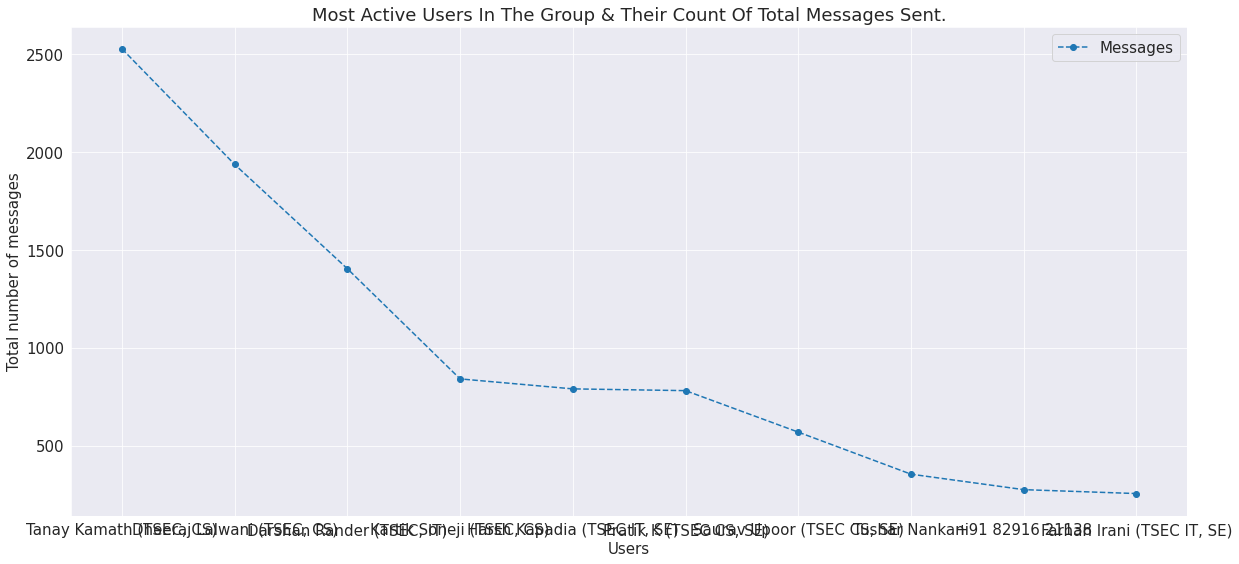

In [50]:
# Improving Default Styles using Seaborn
# sns.set_style("whitegrid")

# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(20, 9))

plt.plot(top10df.user, top10df.message, marker='o', ls='--')

# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")
plt.legend(['Messages']);

We can also plot both Bar Graph and Line Chart for better view.


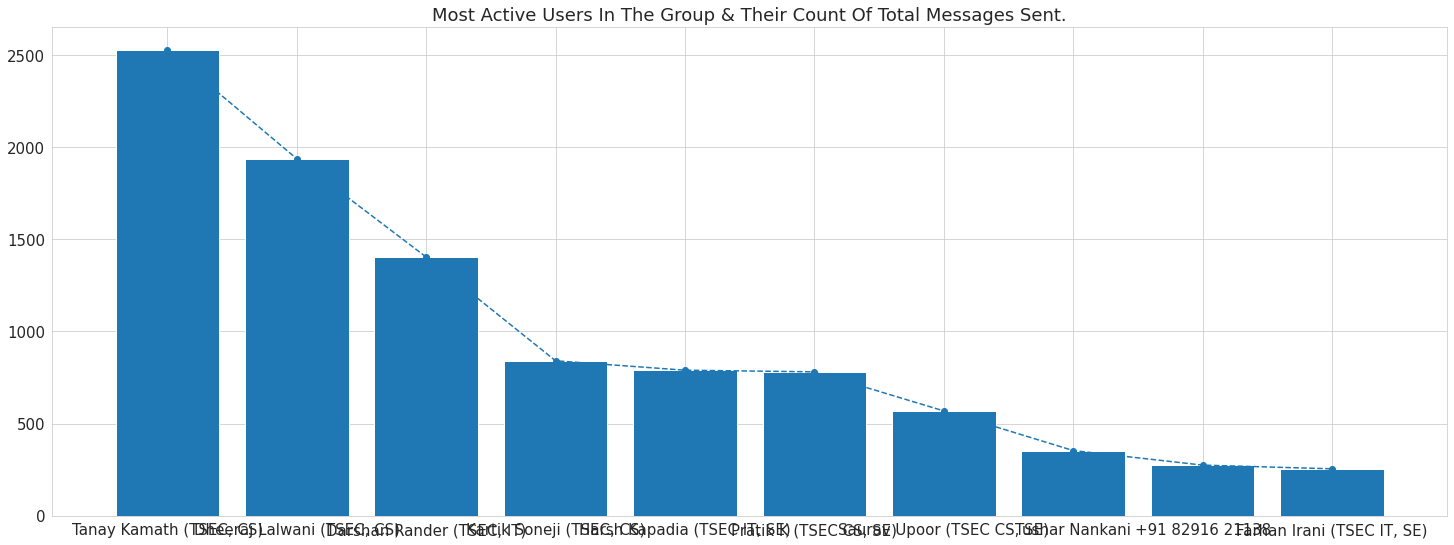

In [51]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(25, 9))


plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")

plt.bar(top10df.user, top10df.message)   # basic bar chart
plt.plot(top10df.user, top10df.message, marker='o', ls='--')  # line chart
plt.show()

As we can see, the person who message most in the group is IPL Sai Sunder followed by Guru and so on.

<br>

##**Fing out the ghosts/inactive members the in the group.**

We can also find out those who are just spectators in the group. They just read messages and pass by.

In [52]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
last10df = df2.groupby("user")["message"].count().sort_values(ascending=True) #either change this or use the tail function instead of head below

# Final Data Frame
last10df = last10df.head(10).reset_index() #if you did not set 'ascending=True', then use tail(10) over here instead of head(10)
last10df

,user,message
0,+91 89833 85127,1
1,+91 96194 00980,1
2,+91 94200 70678,1
3,+91 81696 11905,1
4,+91 77568 95072,1
5,+91 77384 72938,1
6,+91 82080 03744,1
7,+91 91680 38866,1
8,+91 97697 60869,1
9,+91 97698 67348,1


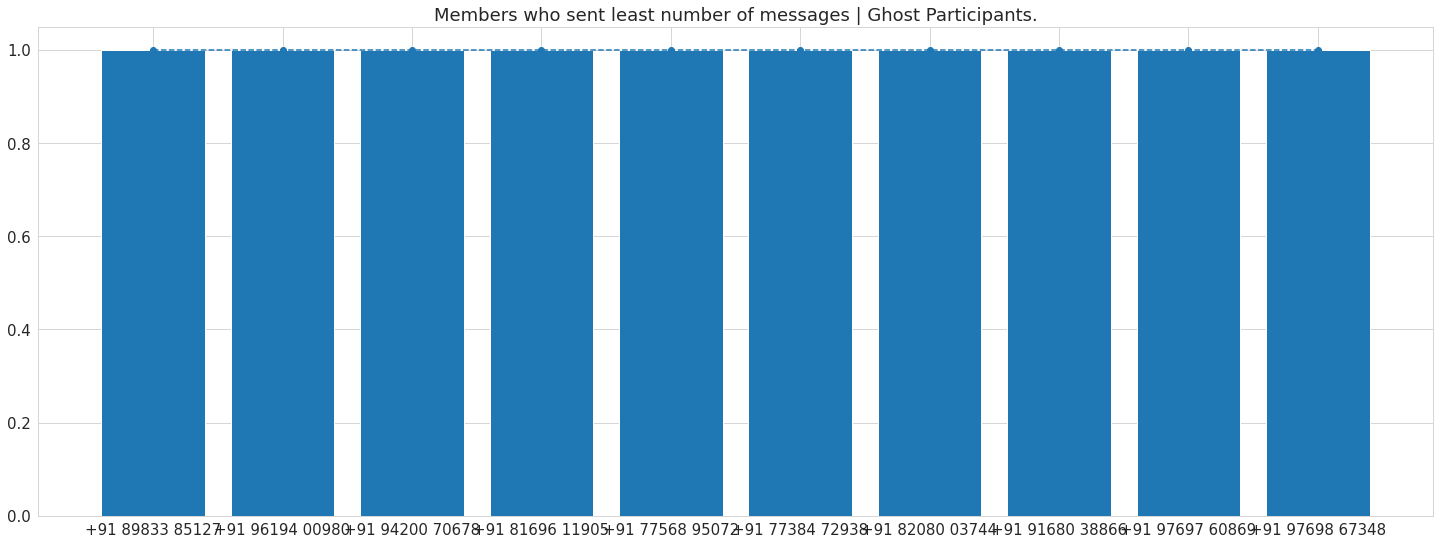

In [53]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size

plt.figure(figsize=(25, 9))

plt.title("Members who sent least number of messages | Ghost Participants.")

plt.bar(last10df.user, last10df.message)   # basic bar chart
plt.plot(last10df.user, last10df.message, marker='o', ls='--')  # line chart
plt.show()

In [ ]:
df[df.message == '<Media omitted> ']

##**Check Top 10 Users Most Sent Media, Total Messages, Average Words Per Messsage .**

In [54]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media


,user,media_sent
0,"Tanay Kamath (TSEC, CS)",124
1,"Dheeraj Lalwani (TSEC, CS)",116
2,Tushar Nankani,51
3,"Darshan Rander (TSEC, IT)",38
4,"Saurav Upoor (TSEC CS, SE)",37
5,"Pratik K (TSEC CS, SE)",36
6,"Harsh Kapadia (TSEC IT, SE)",36
7,"Farhan Irani (TSEC IT, SE)",15
8,"Kartik Soneji (TSEC, CS)",15
9,+91 80979 84068,14


In [ ]:
# df[df['message'] == ""].shape

In [55]:
media_messages_df = df[df.message == '<Media omitted> ']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1


#PRINT ABOVE TO SEE RESULTS

l = ["IPL Sai Sunder", "Guru",'Koustav','Juhi','Meera','TDS']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["user"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} :')
  # shape will print number of rows which indirectly means the number of messages
  print('Total Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['user'] == l[i]].shape[0]
  print('Media Messages Sent', media)

  print('---'*10)

Stats of IPL Sai Sunder :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------
Stats of Guru :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------
Stats of Koustav :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------
Stats of Juhi :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------
Stats of Meera :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------
Stats of TDS :
Total Messages Sent 0
Average Words per message nan
Media Messages Sent 0
------------------------------


##Most active **hours**

In [57]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # new column that will keep count.
 
df3['hour'] = df3['date_time'].apply(lambda x: x.hour)
 
grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

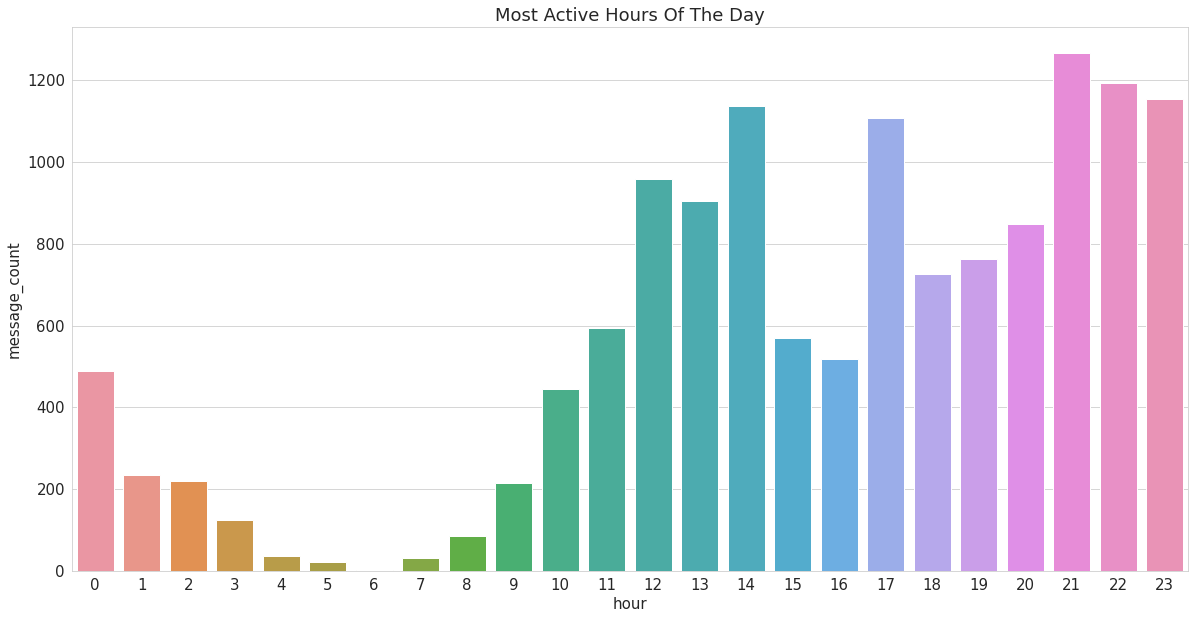

In [58]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_time.hour, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##Most active **Days**

In [ ]:
# specific `order` to be printed in;
# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# grouping by day;
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]

In [ ]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_day.day, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##Most active **Months**

In [ ]:
# specific `order` to be printed in;
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']   # till Sept, since chats are till Septemeber
# grouping by month;
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

In [ ]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_month.month, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

##**Create a WordCloud for the most used words.**

In [61]:

comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
# stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined','join', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 8).generate(comment_words)

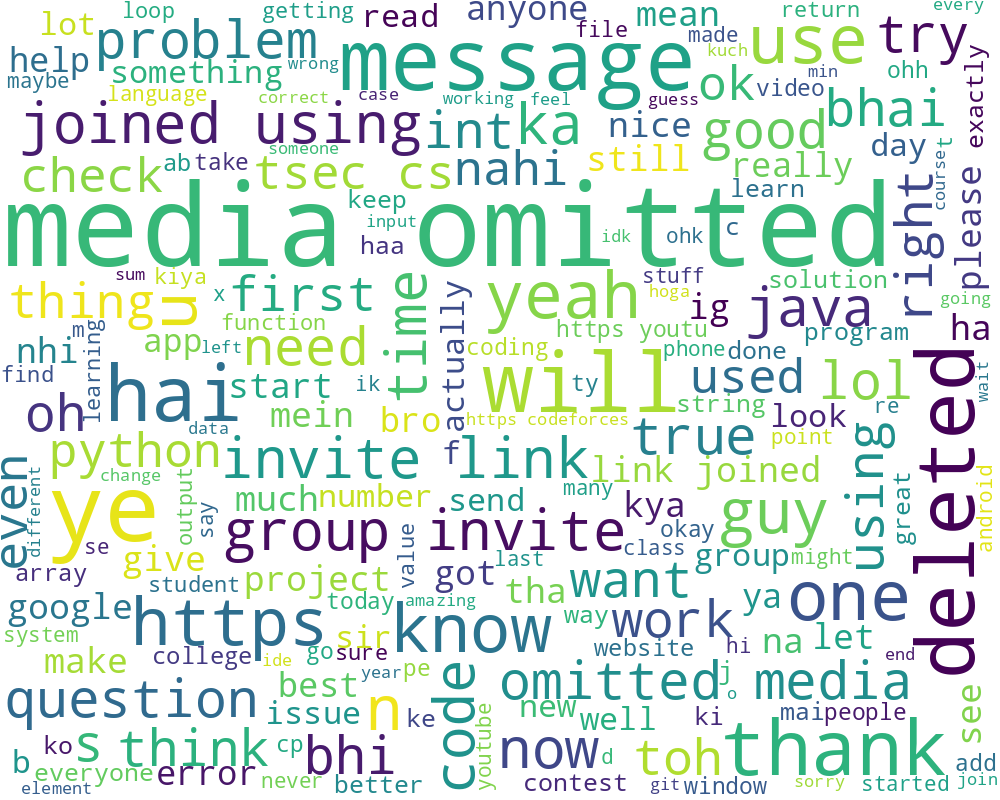

In [62]:
wordcloud.to_image()

##**Create a WordCloud for the most used words by Most Active Members.**

In [66]:
l = ["Darshan Rander (TSEC, IT)"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['user'] == l[i]]
  text = " ".join(messsage for message in dummy_df.message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

NameError: name 'messsage' is not defined

<br>

#Assignment

Write a Python code to fish out the most used media item during conversations. e,g. most used Emojis